<a href="https://colab.research.google.com/github/Rkell93/ADAA-AT3-ASSIGNMENT/blob/master/Copy_of_Mdoelling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ILab2

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Set BITFINIX EXCHANGE - DAILY

## Bitcoin

In [ ]:
BITC_BITFINIX_url = "https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Bitcoin/BITFINEX_BTCUSD%2C%201D.csv"

bitcoin_daily = pd.read_csv (BITC_BITFINIX_url)

### Ethereum

In [ ]:
ETHERIUM_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ethereum/BITFINEX_ETHUSD%2C%201D.csv'

In [ ]:
ethereum_daily = pd.read_csv(ETHERIUM_BITFINIX_url) 

### Ripple 

In [ ]:
RIPPLE_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ripple/BITFINEX_XRPUSD%2C%201D.csv'

In [ ]:
ripple_daily = pd.read_csv(RIPPLE_BITFINIX_url)

## Subset DF

## Subset DF

In [ ]:
bit_bit = bitcoin_daily[['time','open', 'close', 'Volume']]
bit_bit = bit_bit.rename(columns={'open': 'BTC_open', 'close': 'BTC_close', 'Volume': 'BTC_vol'})

In [ ]:
eth_bit = ethereum_daily[['time','open', 'close', 'Volume']]
eth_bit = eth_bit.rename(columns={'open': 'ETHER_open', 'close': 'ETHER_close', 'Volume': 'ETHER_vol'})

In [ ]:
xrp_bit = ripple_daily[['time','open', 'close', 'Volume']]
xrp_bit = xrp_bit.rename(columns={'open': 'XRP_open', 'close': 'XRP_close', 'Volume': 'XRP_vol'})

## Merge



In [ ]:
# Data frames for each coin from BITFINEX
#bit_bit 2,677 observations
#eth_bit 1,497 observations
#xrp_bit 1,176 observations

In [ ]:
bit_eth = pd.merge(bit_bit, eth_bit, how='left', on=['time'])
data = pd.merge(bit_eth, xrp_bit, how='left', on=['time'])

In [ ]:
#Drop NA 
data = data.dropna()
len(data) #1,174 observations after removing NA

1174

# Lag the predictor variables 7 days

In [ ]:
# Duplicate the bitcoin variables before lagging
data['BTC_open_dup'] = data['BTC_open'] 
data['BTC_close_dup'] = data['BTC_close']
data['BTC_vol_dup'] = data['BTC_vol']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Remove the BTC open and BTC vol variables before lagging as they  can't be used for this type of modelling strategy. 
data = data.drop(['BTC_open', 'BTC_vol'], axis = 1)

In [ ]:
# Lag all variables except BTC_close

data['ETHER_open'] = data['ETHER_open'].shift(7)
data['ETHER_close'] = data['ETHER_close'].shift(7)
data['ETHER_vol'] = data['ETHER_vol'].shift(7)

data['XRP_open'] = data['XRP_open'].shift(7)
data['XRP_close'] = data['XRP_close'].shift(7)
data['XRP_vol'] = data['XRP_vol'].shift(7)

data['BTC_open_dup'] = data['BTC_open_dup'].shift(7)
data['BTC_close_dup'] = data['BTC_close_dup'].shift(7)
data['BTC_vol_dup'] = data['BTC_vol_dup'].shift(7)

In [ ]:
# Drop the first 7 rows of the data set as these are NA rows due to the lagging. 
data.drop(data.head(7).index, inplace=True)

# Set the test and train sets

In [ ]:
# Set the  data index as a data col
data.index = range(1,1168)

In [ ]:
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data[1:1071]
test_may = data[1071:1078]

In [ ]:
# July train and test sets
train_july = data[1:1132]
test_july = data[1132:1139]

# Donald Modelling

# **Rob Modelling**

#  Set test and train sets


In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_close']

# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_close']


In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for JULY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_close']

# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_close']


# Linear Model - May

In [ ]:
# Import the requried packages for the linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_may, y_train_may)

In [ ]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_may,x_train_may).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              7349.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):                        0.00
Time:                        04:11:32   Log-Likelihood:                         -8884.2
No. Observations:                1070   AIC:                                  1.779e+04
Df Residuals:                    1061   BIC:                                  1.783e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.4739      1.683      0.876      0.381      -1.828       4.776
ETHER_close      -2.3614      1.689     -1.398      0.162      -5.675       0.952
ETHER_vol        -0.0003      0.000     -1.483      0.138      -0.001    9.76e-05
XRP_open      -3414.9582    740.255     -4.613      0.000   -4867.488   -1962.429
XRP_close      2925.4715    753.450      3.883      0.000    1447.051    4403.892
XRP_vol       -1.277e-06   6.51e-07     -1.961      0.050   -2.56e-06    7.72e-10
BTC_open_dup      0.1394      0.098      1.424      0.155      -0.053       0.331
BTC_close_dup     0.8844      0.097      9.096      0.000       0.694       1.075
BTC_vol_dup       0.0159      0.002      8.325      0.000       0.012       0.020
==============================================================================
Omnibus:                      147.067   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1727.920
Skew:                           0.009   Prob(JB):                         0.00
Kurtosis:                       9.225   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predict the model on the x_test data
y_pred_may = pd.DataFrame(model.predict(x_test_may))
y_pred_may['index'] = range(1,8)

In [ ]:
y_pred_may

,0,index
0,7626.086948,1
1,7526.599476,2
2,7690.725950,3
3,7793.804550,4
4,7850.899369,5
5,8888.264968,6
6,8836.952715,7


In [ ]:
y_test_may = pd.DataFrame(y_test_may)[0:7]
y_test_may['index'] = range(1,8)

In [ ]:
y_test_may

,BTC_close,index
1072,8822.800000,1
1073,8982.300000,2
1074,8899.800000,3
1075,8865.800000,4
1076,9020.100000,5
1077,9152.470993,6
1078,9979.600000,7


In [ ]:
# merge the prediction and actual data frames
merge_may = y_pred_may.merge(y_test_may, on='index', how='left')

In [ ]:
merge_may.columns = ['lm_prediction', 'index', 'real']

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_true = merge_may.real, y_pred = merge_may.lm_prediction)
np.sqrt(MSE)

1127.8739928245245

In [ ]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_may, y_train_may)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8933358021588513


In [ ]:
merge_may

,lm_prediction,index,real
0,7626.086948,1,8822.800000
1,7526.599476,2,8982.300000
2,7690.725950,3,8899.800000
3,7793.804550,4,8865.800000
4,7850.899369,5,9020.100000
5,8888.264968,6,9152.470993
6,8836.952715,7,9979.600000


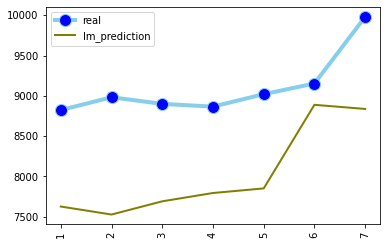

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - May

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

lasso = Lasso()

In [ ]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [ ]:
lasso_regressor = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)#GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [ ]:
lasso = lasso_regressor.fit(x_train_may, y_train_may)

In [ ]:
# Predict the model on the x_test data
y_pred_may_lasso = pd.DataFrame(lasso.predict(x_test_may))
y_pred_may_lasso['index'] = range(1,8)

In [ ]:
y_pred_may_lasso

,0,index
0,7619.051456,1
1,7540.843968,2
2,7704.844636,3
3,7797.110522,4
4,7814.768118,5
5,8932.928478,6
6,8831.216923,7


In [ ]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_lasso, on='index', how='left')

In [ ]:
merge_may

,lm_prediction,index,real,0
0,7626.086948,1,8822.800000,7619.051456
1,7526.599476,2,8982.300000,7540.843968
2,7690.725950,3,8899.800000,7704.844636
3,7793.804550,4,8865.800000,7797.110522
4,7850.899369,5,9020.100000,7814.768118
5,8888.264968,6,9152.470993,8932.928478
6,8836.952715,7,9979.600000,8831.216923


In [ ]:
merge_may.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [ ]:
MSE = mean_squared_error(y_true = merge_may.real, y_pred = merge_may.lasso_prediction)
np.sqrt(MSE)

1128.6293280870077

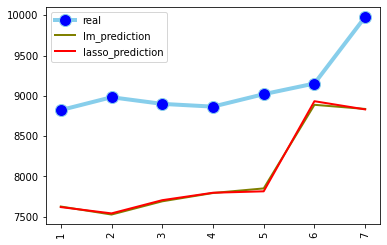

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - May

In [ ]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
y_train_may = pd.DataFrame(y_train_may)

In [ ]:
y_train_may.BTC_close

In [ ]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_may)
y = sc_y.fit_transform(y_train_may)

In [ ]:
y = y[:, 0]

In [ ]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'poly')
SVR_reg = svr_regressor.fit(X, y)

In [ ]:
# Predict the model on the x_test data
x_test_may = sc_X.fit_transform(x_test_may)

y_pred_may_svr = SVR_reg.predict(x_test_may)
y_pred_may_svr = sc_y.inverse_transform(y_pred_may_svr) 


y_pred_may_svr = pd.DataFrame(y_pred_may_svr)
y_pred_may_svr['index'] = range(1,8)
y_pred_may_svr

,0,index
0,6233.990297,1
1,6457.953900,2
2,6479.903842,3
3,6640.965524,4
4,6510.529127,5
5,7965.608332,6
6,14049.828929,7


In [ ]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_svr, on='index', how='left')

In [ ]:
merge_may.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction', 'svr_prediction_rgb', 'svr_prediction_poly']

In [ ]:
merge_may

,lm_prediction,index,real,lasso_prediction,svr_prediction_rgb,svr_prediction_poly
0,7626.086948,1,8822.800000,7619.051456,6058.661102,6233.990297
1,7526.599476,2,8982.300000,7540.843968,5776.526021,6457.953900
2,7690.725950,3,8899.800000,7704.844636,6008.156916,6479.903842
3,7793.804550,4,8865.800000,7797.110522,6429.360692,6640.965524
4,7850.899369,5,9020.100000,7814.768118,6462.714961,6510.529127
5,8888.264968,6,9152.470993,8932.928478,10266.870433,7965.608332
6,8836.952715,7,9979.600000,8831.216923,11074.242543,14049.828929


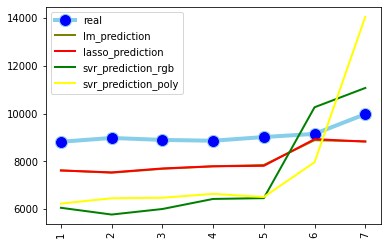

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
plt.plot( 'index', 'svr_prediction_rgb', data=merge_may, marker='', color='green', linewidth=2)
plt.plot( 'index', 'svr_prediction_poly', data=merge_may, marker='', color='yellow', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Linear Model - July

In [ ]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_july, y_train_july)

In [ ]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_july,x_train_july).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8241.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):                        0.00
Time:                        05:02:31   Log-Likelihood:                         -9371.7
No. Observations:                1131   AIC:                                  1.876e+04
Df Residuals:                    1122   BIC:                                  1.881e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.4717      1.651      0.891      0.373      -1.768       4.712
ETHER_close      -2.3577      1.657     -1.423      0.155      -5.609       0.893
ETHER_vol        -0.0003      0.000     -1.451      0.147      -0.001       0.000
XRP_open      -3442.9932    726.922     -4.736      0.000   -4869.273   -2016.714
XRP_close      2938.4025    739.956      3.971      0.000    1486.550    4390.255
XRP_vol       -1.306e-06   6.39e-07     -2.042      0.041   -2.56e-06   -5.12e-08
BTC_open_dup      0.1473      0.094      1.560      0.119      -0.038       0.332
BTC_close_dup     0.8783      0.094      9.367      0.000       0.694       1.062
BTC_vol_dup       0.0158      0.002      8.462      0.000       0.012       0.019
==============================================================================
Omnibus:                      157.657   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1921.012
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                       9.385   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predict the model on the x_test data
y_pred_july = pd.DataFrame(model.predict(x_test_july))
y_pred_july['index'] = range(1,8)

In [ ]:
y_test_july = pd.DataFrame(y_test_july)[0:7]
y_test_july['index'] = range(1,8)

In [ ]:
# merge the prediction and actual data frames
merge_july = y_pred_july.merge(y_test_july, on='index', how='left')

In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real']

In [ ]:
MSE = mean_squared_error(y_true = merge_july.real, y_pred = merge_july.lm_prediction)
np.sqrt(MSE)

127.55786750036722

In [ ]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_july, y_train_july)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8942229300571196


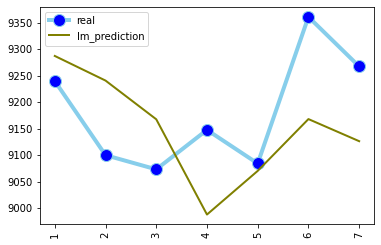

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - July

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

In [ ]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [ ]:
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [ ]:
lasso = lasso_regressor.fit(x_train_july, y_train_july)

In [ ]:
print(lasso.best_params_)

{'alpha': 1e-15}


In [ ]:
print(lasso.best_score_)

-997010.4666424043


In [ ]:
# Predict the model on the x_test data
y_pred_july_lasso = pd.DataFrame(lasso.predict(x_test_july))
y_pred_july_lasso['index'] = range(1,8)

In [ ]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_lasso, on='index', how='left')

In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [ ]:
MSE = mean_squared_error(y_true = merge_july.real, y_pred = merge_july.lasso_prediction)
np.sqrt(MSE)

127.57497646038792

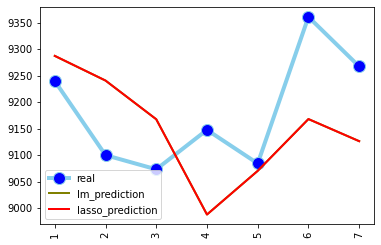

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_july, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - July

In [ ]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
y_train_july = pd.DataFrame(y_train_july)

In [ ]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_july)
y = sc_y.fit_transform(y_train_july)

In [ ]:
y = y[:, 0]

In [ ]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'rbf')
SVR_reg = svr_regressor.fit(X, y)

In [ ]:
# Predict the model on the x_test data
x_test_july = sc_X.fit_transform(x_test_july)

y_pred_july_svr = SVR_reg.predict(x_test_july)
y_pred_july_svr = sc_y.inverse_transform(y_pred_july_svr) 


y_pred_july_svr = pd.DataFrame(y_pred_july_svr)
y_pred_july_svr['index'] = range(1,8)
y_pred_july_svr

,0,index
0,11114.335817,1
1,9753.279073,2
2,7710.265580,3
3,6254.006371,4
4,6684.506516,5
5,8418.032689,6
6,7517.340586,7


In [ ]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_svr, on='index', how='left')

In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction', 'svr_prediction']

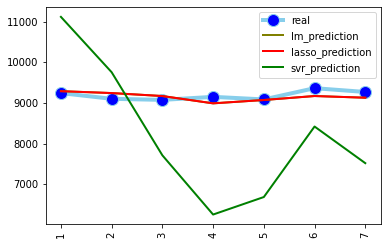

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_july, marker='', color='red', linewidth=2)
plt.plot( 'index', 'svr_prediction', data=merge_july, marker='', color='green', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()